In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

In [9]:
df=pd.read_csv("/work/United_Data.csv")
df

,Review,Date,Stars,Country
0,paid serious money business class ticket anto...,2024-10-10,3,New Zealand
1,first half flight went yet find charged using...,2024-10-09,2,United States
2,booked roundtrip united airline return flew e...,2024-10-08,4,United States
3,fifteen hour abject food slop feed farm sure ...,2024-10-05,1,United States
4,negative stuff flying around wanted add posit...,2024-10-03,3,United States
...,...,...,...,...
575,newark los hour delay due missing crew comple...,2018-07-29,1,United States
576,newark unprofessional arrogant flew nj immedi...,2018-07-28,1,United States
577,el paso family never flying united time sloga...,2018-07-27,10,United States
578,phoenix united zero compassion medical told s...,2018-07-27,1,United States


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader=SentimentIntensityAnalyzer()

In [19]:
def get_vader_sentiment(review):
    vader_scores=vader.polarity_scores(review)
    if vader_scores["compound"] >= 0.05:
        return "Positive"
    elif vader_scores["compound"] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [21]:
df["VADER_Polarity"]=df["Review"].apply(get_vader_sentiment)
df

,Review,Date,Stars,Country,VADER_Polarity
0,paid serious money business class ticket anto...,2024-10-10,3,New Zealand,Positive
1,first half flight went yet find charged using...,2024-10-09,2,United States,Negative
2,booked roundtrip united airline return flew e...,2024-10-08,4,United States,Positive
3,fifteen hour abject food slop feed farm sure ...,2024-10-05,1,United States,Negative
4,negative stuff flying around wanted add posit...,2024-10-03,3,United States,Positive
...,...,...,...,...,...
575,newark los hour delay due missing crew comple...,2018-07-29,1,United States,Negative
576,newark unprofessional arrogant flew nj immedi...,2018-07-28,1,United States,Negative
577,el paso family never flying united time sloga...,2018-07-27,10,United States,Positive
578,phoenix united zero compassion medical told s...,2018-07-27,1,United States,Positive


In [25]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install --upgrade transformers


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
from transformers import pipeline
analyzer=pipeline("sentiment-analysis")

def get_huggingface(review):
    result=analyzer(review)
    return result[0]["label"]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [33]:
df["HF_Label"]=df["Review"].apply(get_huggingface)
df

,Review,Date,Stars,Country,VADER_Polarity,HF_Label
0,paid serious money business class ticket anto...,2024-10-10,3,New Zealand,Positive,NEGATIVE
1,first half flight went yet find charged using...,2024-10-09,2,United States,Negative,NEGATIVE
2,booked roundtrip united airline return flew e...,2024-10-08,4,United States,Positive,NEGATIVE
3,fifteen hour abject food slop feed farm sure ...,2024-10-05,1,United States,Negative,NEGATIVE
4,negative stuff flying around wanted add posit...,2024-10-03,3,United States,Positive,NEGATIVE
...,...,...,...,...,...,...
575,newark los hour delay due missing crew comple...,2018-07-29,1,United States,Negative,NEGATIVE
576,newark unprofessional arrogant flew nj immedi...,2018-07-28,1,United States,Negative,NEGATIVE
577,el paso family never flying united time sloga...,2018-07-27,10,United States,Positive,NEGATIVE
578,phoenix united zero compassion medical told s...,2018-07-27,1,United States,Positive,NEGATIVE


In [35]:
df["HF_Label"]=df["HF_Label"].replace({"NEGATIVE":"Negative","POSITIVE":"Positive"})
df

,Review,Date,Stars,Country,VADER_Polarity,HF_Label
0,paid serious money business class ticket anto...,2024-10-10,3,New Zealand,Positive,Negative
1,first half flight went yet find charged using...,2024-10-09,2,United States,Negative,Negative
2,booked roundtrip united airline return flew e...,2024-10-08,4,United States,Positive,Negative
3,fifteen hour abject food slop feed farm sure ...,2024-10-05,1,United States,Negative,Negative
4,negative stuff flying around wanted add posit...,2024-10-03,3,United States,Positive,Negative
...,...,...,...,...,...,...
575,newark los hour delay due missing crew comple...,2018-07-29,1,United States,Negative,Negative
576,newark unprofessional arrogant flew nj immedi...,2018-07-28,1,United States,Negative,Negative
577,el paso family never flying united time sloga...,2018-07-27,10,United States,Positive,Negative
578,phoenix united zero compassion medical told s...,2018-07-27,1,United States,Positive,Negative


In [41]:
df["VADER_Polarity"].value_counts()

VADER_Polarity
Positive    309
Negative    253
Neutral      18
Name: count, dtype: int64

In [43]:
df["HF_Label"].value_counts()

HF_Label
Negative    533
Positive     47
Name: count, dtype: int64

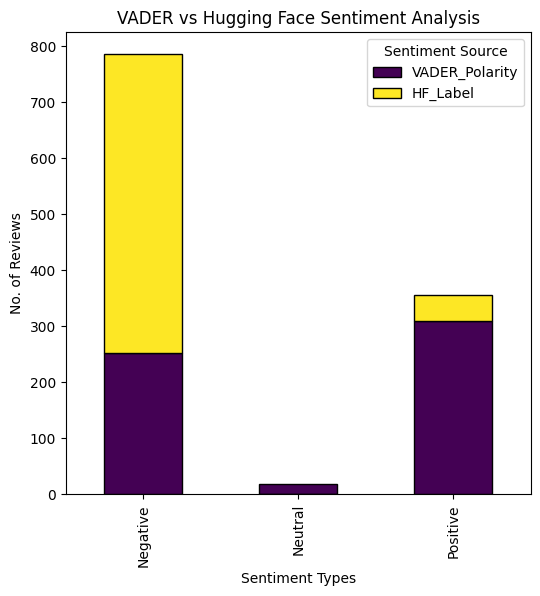

In [47]:
b=df[["VADER_Polarity","HF_Label"]].apply(pd.Series.value_counts,axis=0)
b.plot(kind="bar",stacked=True,figsize=(6,6),colormap="viridis", edgecolor="black")
plt.title("VADER vs Hugging Face Sentiment Analysis")
plt.xlabel("Sentiment Types")
plt.ylabel("No. of Reviews")
plt.legend(title="Sentiment Source")
plt.show()

In [49]:
df

,Review,Date,Stars,Country,VADER_Polarity,HF_Label
0,paid serious money business class ticket anto...,2024-10-10,3,New Zealand,Positive,Negative
1,first half flight went yet find charged using...,2024-10-09,2,United States,Negative,Negative
2,booked roundtrip united airline return flew e...,2024-10-08,4,United States,Positive,Negative
3,fifteen hour abject food slop feed farm sure ...,2024-10-05,1,United States,Negative,Negative
4,negative stuff flying around wanted add posit...,2024-10-03,3,United States,Positive,Negative
...,...,...,...,...,...,...
575,newark los hour delay due missing crew comple...,2018-07-29,1,United States,Negative,Negative
576,newark unprofessional arrogant flew nj immedi...,2018-07-28,1,United States,Negative,Negative
577,el paso family never flying united time sloga...,2018-07-27,10,United States,Positive,Negative
578,phoenix united zero compassion medical told s...,2018-07-27,1,United States,Positive,Negative


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0d4583b4-0590-436d-87dc-0521c05936e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>